---
---

### Part 1
#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
### Part 2
#### 3. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement Random Forest Classifier



# Part 2
## 3. Prediction (Multi-class Classification)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.tree import plot_tree
from yellowbrick.classifier import ClassPredictionError, ROCAUC

### Data Preprocessing

In [2]:
data=pd.read_csv("pendigits_txt.csv")
data_cleaned=pd.read_csv("handdigit_EDA.csv")

In [3]:
X=data_cleaned.drop("class", axis=1)
y= data_cleaned["class"]

In [4]:
X_train, X_test, y_train, y_test= train_test_split (X,y,test_size=0.25, shuffle=False)

### Implementing Random Forest Classifier

In [5]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [6]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [7]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[267   0   0   0   0   0   0   0   4   0]
 [  0 249  15   0   1   0   0   1   0   0]
 [  0   3 288   0   0   0   0   1   0   0]
 [  0   1   0 272   0   1   0   0   0   1]
 [  0   0   0   0 288   0   0   0   0   0]
 [  0   0   0   3   0 254   0   0   3   4]
 [  0   0   0   0   0   0 260   0   0   0]
 [  0   3   2   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0 251   0]
 [  0   0   0   1   0   0   0   2   1 261]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       271
           1       0.97      0.94      0.95       266
           2       0.94      0.99      0.96       292
           3       0.99      0.99      0.99       275
           4       1.00      1.00      1.00       288
           5       1.00      0.96      0.98       264
           6       1.00      1.00      1.00       260
           7       0.98      0.98      0.98       260
           8       0.97      1.00      0.98       251
           9       

In [8]:
scores=cross_validate(rf_model, X_train, y_train, scoring=["f1_micro"],
                      cv=10, return_train_score=True, n_jobs=-1)
df_scores=pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_micro     0.989965
train_f1_micro    1.000000
dtype: float64

## GridSearch

In [9]:
param_grid={'criterion': ["entropy","gini"],
             'n_estimators':[128, 200],
             'max_features':[0.8, 1, 2, 3, 'sqrt'],
             'max_depth':[6, 7, 8]}

In [10]:
model=RandomForestClassifier()
rf_grid=GridSearchCV(model,param_grid, scoring="f1_micro", n_jobs=-1)
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [6, 7, 8],
                         'max_features': [0.8, 1, 2, 3, 'sqrt'],
                         'n_estimators': [128, 200]},
             scoring='f1_micro')

In [11]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'n_estimators': 200}

In [12]:
rf_grid.best_score_

0.981170178891357

In [13]:
eval_metric(rf_grid, X_train, y_train, X_test, y_test)

Test_Set
[[268   0   0   0   0   0   0   0   3   0]
 [  0 241  23   0   1   0   0   1   0   0]
 [  0   4 286   0   0   0   0   2   0   0]
 [  0   2   0 273   0   0   0   0   0   0]
 [  0   0   0   0 288   0   0   0   0   0]
 [  0   0   0   5   0 249   0   0   1   9]
 [  0   0   0   0   0   1 259   0   0   0]
 [  0   6   4   0   0   0   0 249   1   0]
 [  2   0   0   0   0   0   0   0 249   0]
 [  0   1   0   2   0   0   0   2   1 259]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       271
           1       0.95      0.91      0.93       266
           2       0.91      0.98      0.95       292
           3       0.97      0.99      0.98       275
           4       1.00      1.00      1.00       288
           5       1.00      0.94      0.97       264
           6       1.00      1.00      1.00       260
           7       0.98      0.96      0.97       260
           8       0.98      0.99      0.98       251
           9       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


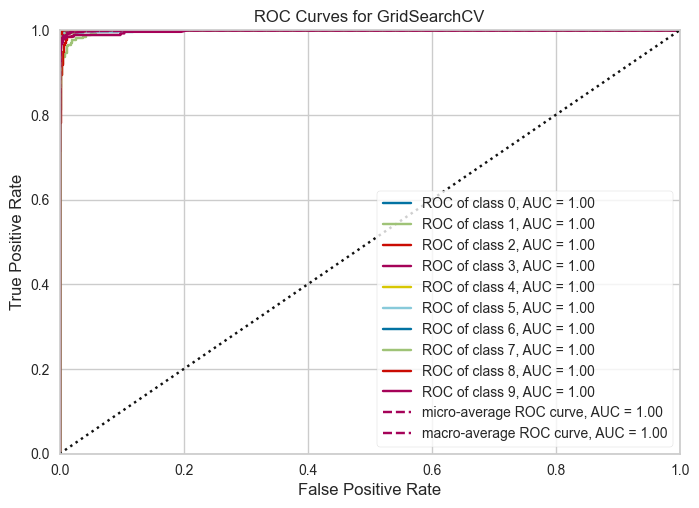

In [14]:
visualizer = ROCAUC(rf_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


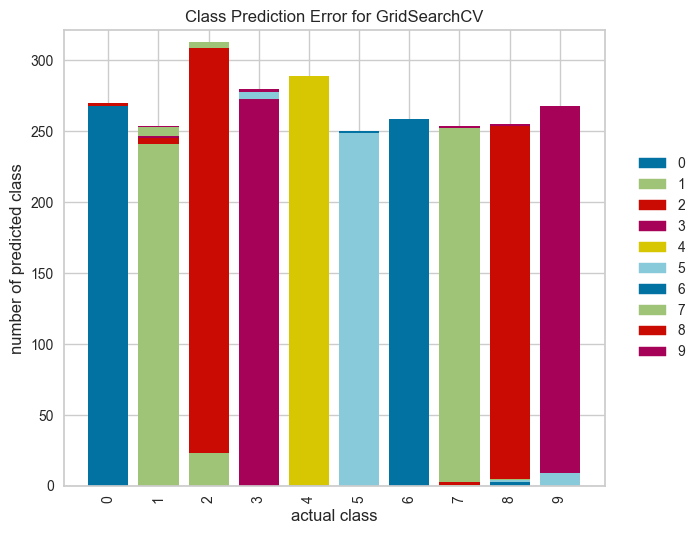

In [15]:
visualizer = ClassPredictionError(rf_grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show();